#                                             Heart Failure Analysis

In [74]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [83]:
data = pd.read_csv('heart_failure.csv')

# First 5 Rows Of Data

In [86]:
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

# Last 5 Rows Of Data

In [89]:
print(data.tail())

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0

# Checking Null or Missing Values

In [92]:
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


# Info

In [95]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


# Remove un-needed 'time' column

In [98]:
data_cleaned = data.drop(columns=['time'])

# Get Overall Statistics About The Dataset

In [101]:
print(data_cleaned.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

# Shape

In [104]:
print(data_cleaned.shape)

(299, 12)


In [151]:
print(f"Number of Rows {data_cleaned.shape[0]}")
print(f"Number of Columns {data_cleaned.shape[1]}")

Number of Rows 299
Number of Columns 12


# Value counts for specific columns

In [107]:
print("\nGender Counts (0: Female, 1: Male):")
print(data_cleaned['sex'].value_counts())

print("\nHigh Blood Pressure Counts (0: No, 1: Yes):")
print(data_cleaned['high_blood_pressure'].value_counts())

print("\nDiabetes Counts (0: No, 1: Yes):")
print(data_cleaned['diabetes'].value_counts())

print("\nSmoking Counts (0: No, 1: Yes):")
print(data_cleaned['smoking'].value_counts())

print("\nDeath Event Counts (0: No, 1: Yes):")
print(data_cleaned['DEATH_EVENT'].value_counts())


Gender Counts (0: Female, 1: Male):
sex
1    194
0    105
Name: count, dtype: int64

High Blood Pressure Counts (0: No, 1: Yes):
high_blood_pressure
0    194
1    105
Name: count, dtype: int64

Diabetes Counts (0: No, 1: Yes):
diabetes
0    174
1    125
Name: count, dtype: int64

Smoking Counts (0: No, 1: Yes):
smoking
0    203
1     96
Name: count, dtype: int64

Death Event Counts (0: No, 1: Yes):
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


# Visualization

# Pairplot to show relationships across the dataset

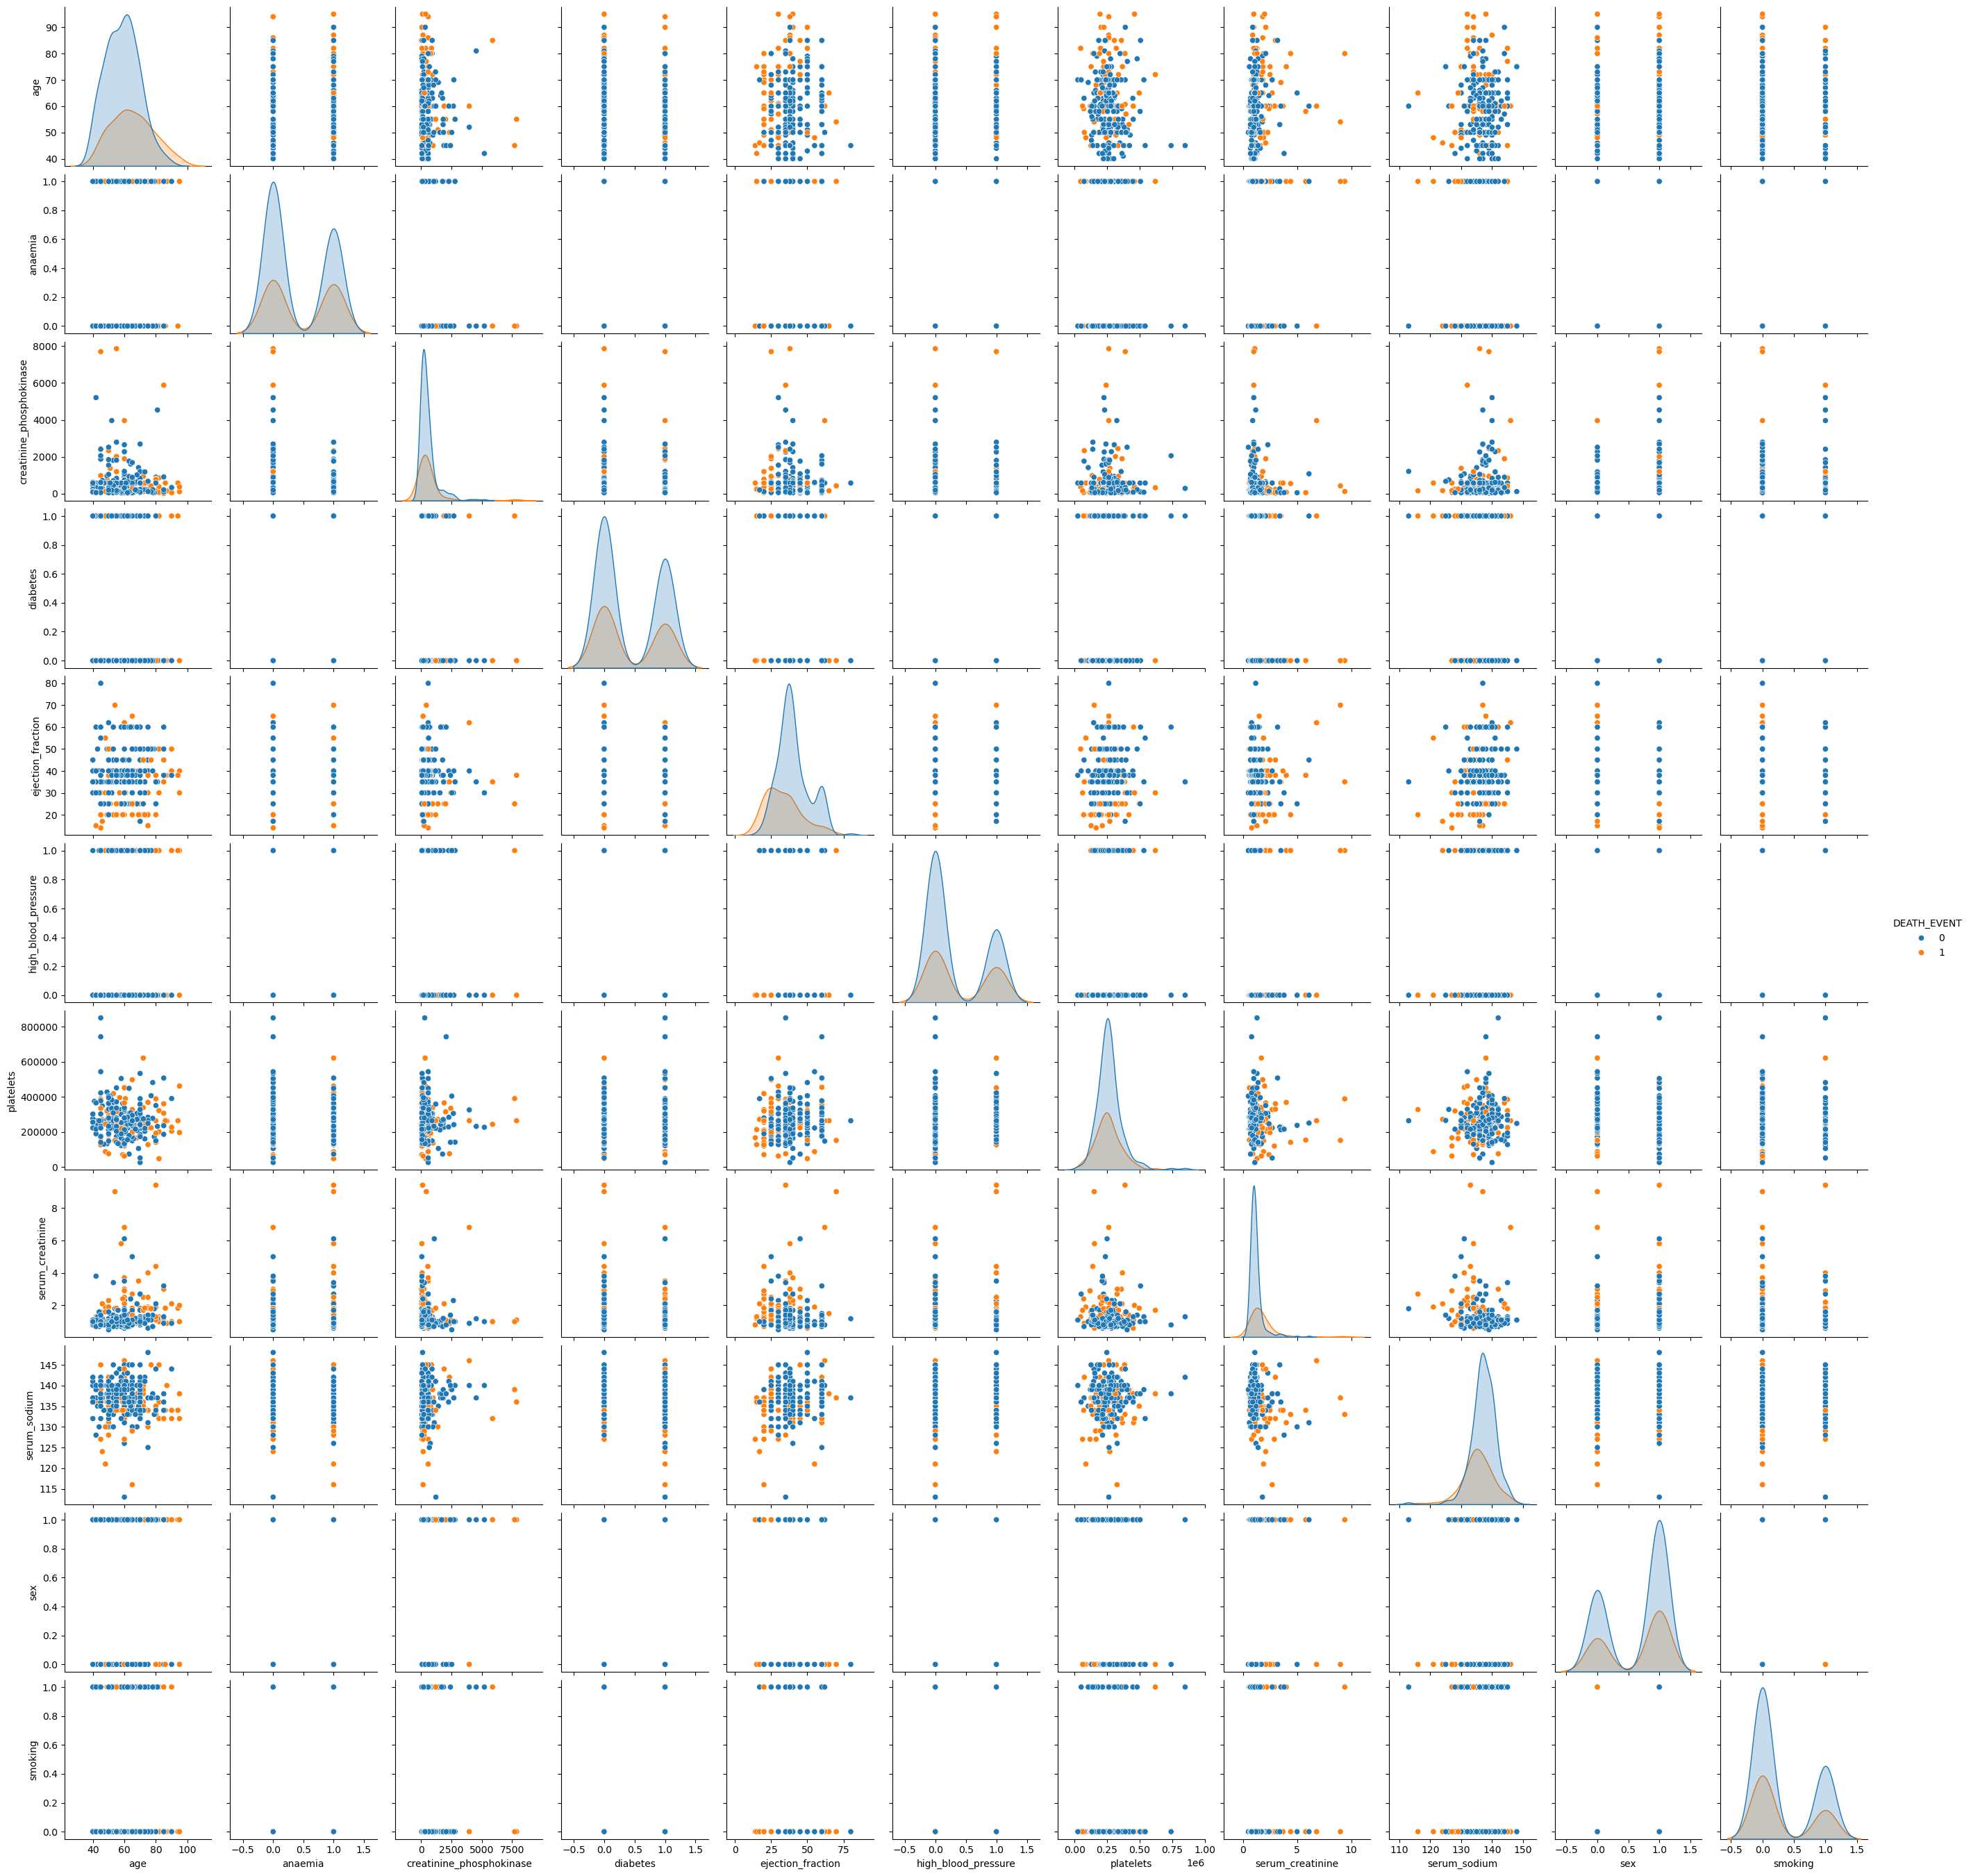

In [111]:
sns.pairplot(data_cleaned, hue="DEATH_EVENT")
plt.show()

# Bar plot showing the relationship between 'sex' and its frequency

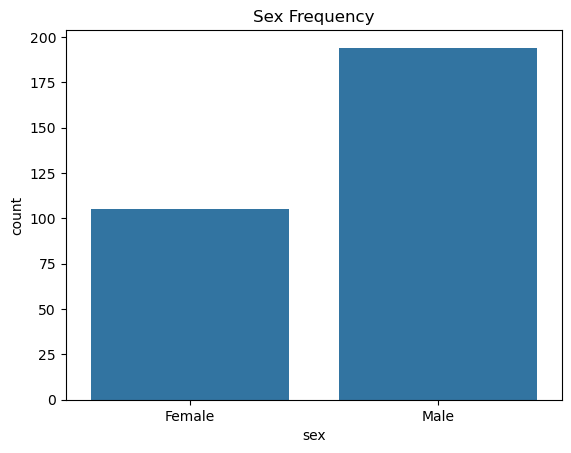

In [158]:
sns.countplot(x='sex', data=data_cleaned)
plt.title('Sex Frequency')
plt.xticks([0,1],['Female','Male'])
plt.show()

# Bar plot showing the relationship between 'death_event' and its frequency

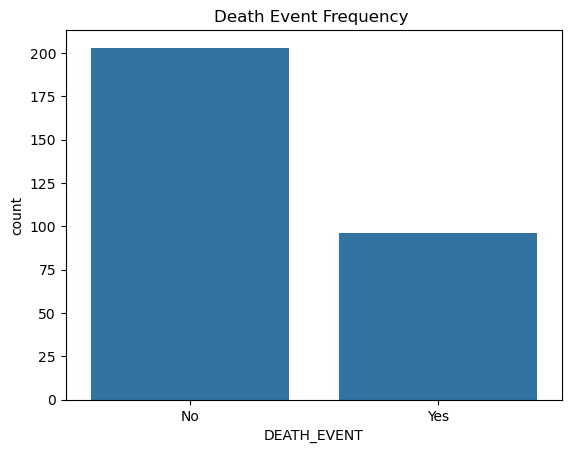

In [160]:
sns.countplot(x='DEATH_EVENT', data=data_cleaned)
plt.title('Death Event Frequency ')
plt.xticks([0,1],['No','Yes'])
plt.show()

# Bar plot of Death Event per each sex

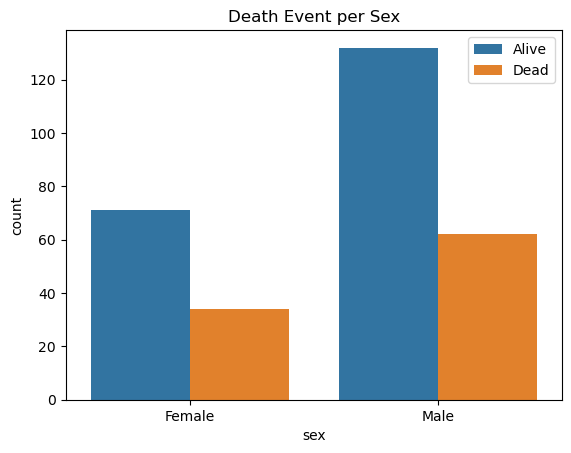

In [168]:
sns.countplot(x='sex', hue='DEATH_EVENT', data=data_cleaned)
plt.title('Death Event per Sex')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Alive','Dead'])
plt.show()

# Heatmap showing correlation between sex and death rate

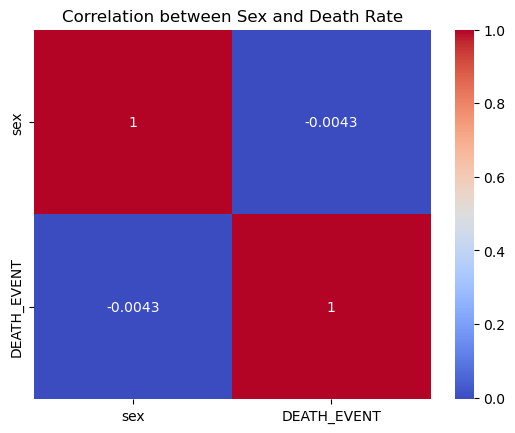

In [127]:
sns.heatmap(data_cleaned[['sex', 'DEATH_EVENT']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sex and Death Rate')
plt.show()

# Bar plot showing smoking against death event

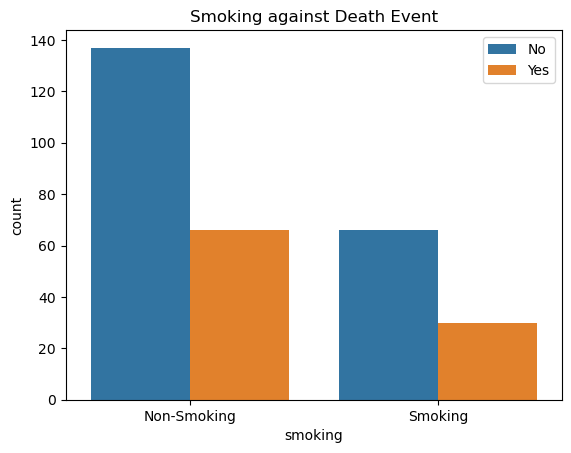

In [178]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=data_cleaned)
plt.title('Smoking against Death Event')
plt.legend(labels=['No','Yes'])
plt.xticks([0,1],['Non-Smoking','Smoking'])
plt.show()

# Catplot showing high blood pressure with age

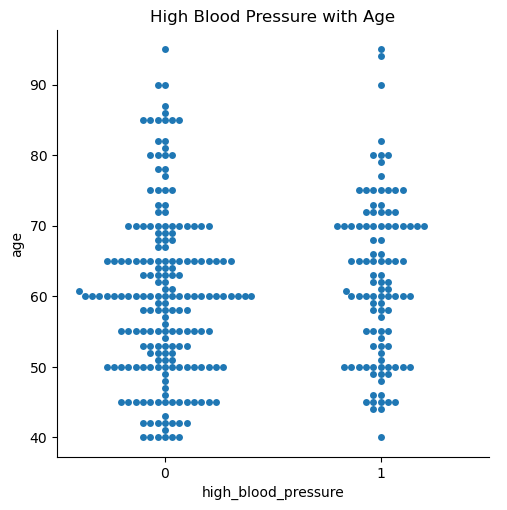

In [133]:
sns.catplot(x='high_blood_pressure', y='age', data=data_cleaned, kind="swarm")
plt.title('High Blood Pressure with Age')
plt.show()

# Correlation Matrix of Heart Failure Data

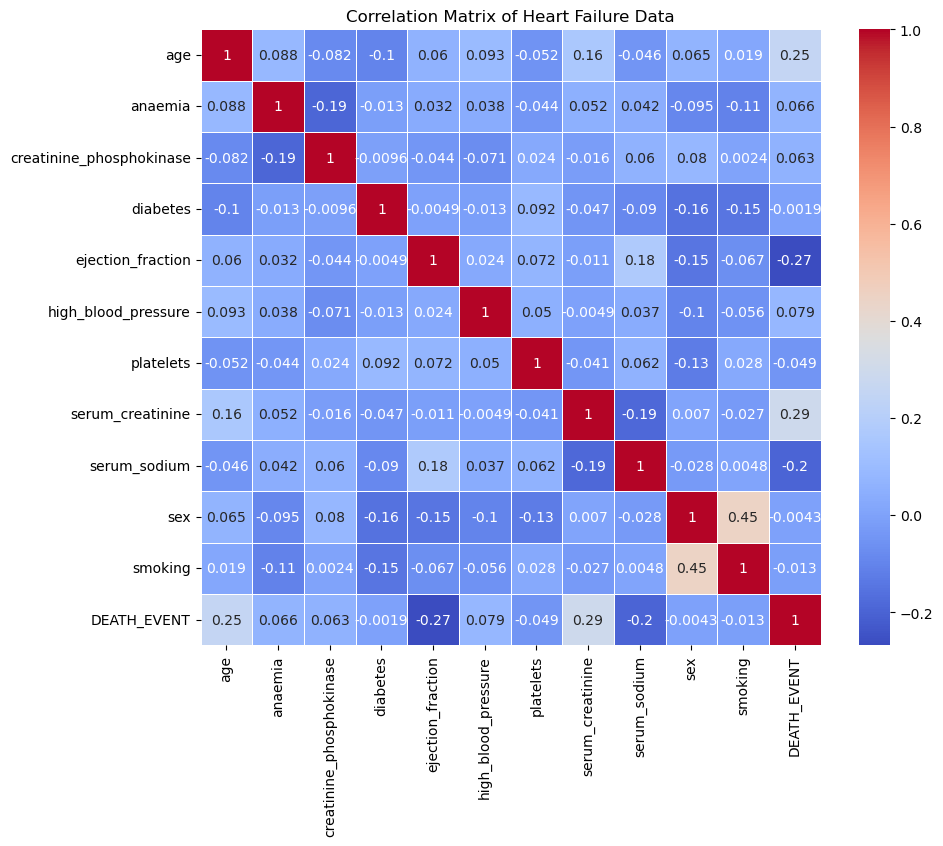

In [140]:
correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Failure Data')
plt.show()

# Plot age distribution for both survivors and non-survivors

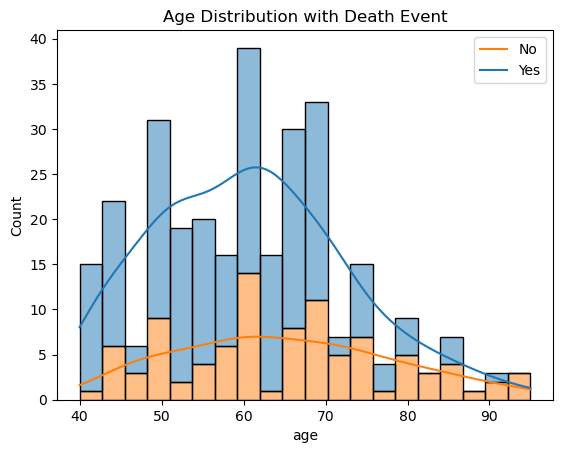

In [185]:
sns.histplot(data=data_cleaned, x='age', bins=20, hue='DEATH_EVENT', multiple='stack', kde=True)
plt.title('Age Distribution with Death Event')
plt.legend(labels=['No','Yes'])
plt.show()

# Violin Plot of Ejection Fraction by Death Event

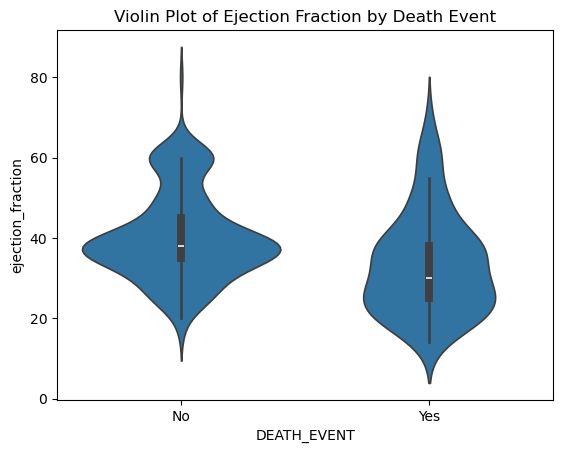

In [187]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=data_cleaned)
plt.title('Violin Plot of Ejection Fraction by Death Event')
plt.xticks([0,1],['No','Yes'])
plt.show()

# Age vs Ejection Fraction with Death Event

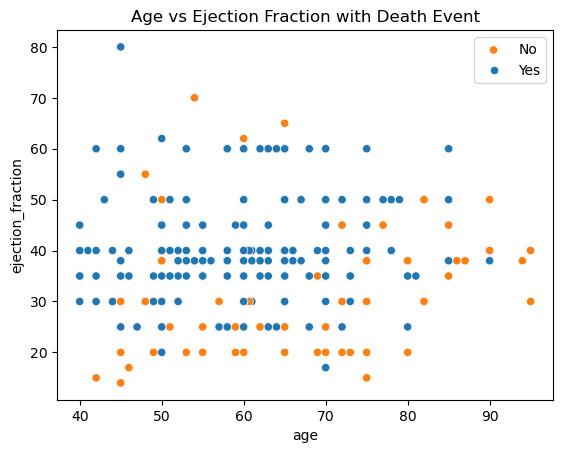

In [189]:
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT', data=data_cleaned)
plt.title('Age vs Ejection Fraction with Death Event')
plt.legend(labels=['No','Yes'])
plt.show()